In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [16]:
from sklearn.datasets import fetch_openml

In [17]:
x,y = fetch_openml('mnist_784' , version = 1 , return_X_y = True)

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y,test_size = 0.85)

In [42]:
xtrain_np = xtrain.to_numpy() 

In [45]:
xtrain_img = xtrain_np.reshape(len(xtrain_np),28,28)
xtrain_img[10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

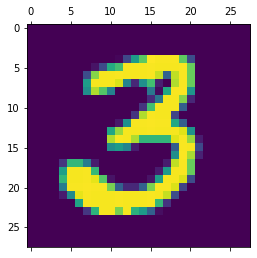

In [47]:
plt.matshow(xtrain_img[10]);

In [34]:
xtrain = xtrain / 255.
xtest = xtest / 255.

In [48]:
model = keras.Sequential([
    keras.layers.Dense(11,input_shape=(784,) , activation='sigmoid')
])

In [49]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
ytrain_np = ytrain.to_numpy(dtype = 'float')

In [56]:
ytrain_np

array([1., 0., 3., ..., 0., 9., 3.])

In [57]:
model.fit(xtrain_np, ytrain_np, epochs=6)

Epoch 1/6
329/329 [==============================] - 6s 7ms/step - loss: 0.8765 - accuracy: 0.7870
Epoch 2/6
329/329 [==============================] - 85s 259ms/step - loss: 0.4436 - accuracy: 0.8885
Epoch 3/6
329/329 [==============================] - 2s 7ms/step - loss: 0.3714 - accuracy: 0.9022
Epoch 4/6
329/329 [==============================] - 2s 7ms/step - loss: 0.3371 - accuracy: 0.9094
Epoch 5/6
329/329 [==============================] - 2s 5ms/step - loss: 0.3151 - accuracy: 0.9153
Epoch 6/6
329/329 [==============================] - 1s 4ms/step - loss: 0.2984 - accuracy: 0.9185


In [58]:
ytest =ytest.to_numpy(dtype = 'float')
xtest = xtest.to_numpy()

In [59]:
model.evaluate(xtest,ytest)

1860/1860 [==============================] - 9s 4ms/step - loss: 0.3274 - accuracy: 0.9066


[0.32737764716148376, 0.9066386818885803]

In [60]:
ypredict = model.predict(xtest)

1860/1860 [==============================] - 8s 4ms/step


In [61]:
ypredict[9]

array([0.00299871, 0.9640973 , 0.7187603 , 0.07202311, 0.21524654,
       0.04748667, 0.12073738, 0.18236797, 0.68417776, 0.01877019,
       0.00441169], dtype=float32)

Text(0.5, 1.0, 'Real Number')

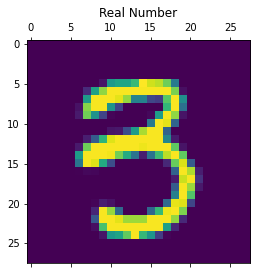

In [68]:
xtest_img = xtest.reshape(len(xtest),28,28)
plt.matshow(xtest_img[2]);
plt.title("Real Number")

In [70]:
np.argmax(ypredict[2])

3

In [74]:
y_predicted_labels = [np.argmax(i) for i in ypredict]
confusion_matrix = tf.math.confusion_matrix(labels=ytest,predictions=y_predicted_labels)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[5673,    0,   32,   16,    9,   32,   49,    6,   45,   10],
       [   0, 6467,   36,   39,    7,   44,   13,   12,   58,   15],
       [  42,   54, 5223,  132,  106,   25,   89,   93,  132,   24],
       [  15,   33,  156, 5413,   10,  208,   32,   56,   82,   87],
       [  12,   17,   32,    5, 5364,    6,   59,   11,   33,  286],
       [  70,   32,   34,  229,   76, 4468,  129,   13,  176,   94],
       [  37,   22,   43,    5,   47,  101, 5524,    7,   28,    1],
       [  32,   44,   83,   33,   79,    5,    3, 5641,   10,  291],
       [  44,  124,   95,  217,   49,  203,   61,   40, 4844,  173],
       [  31,   23,   28,   86,  210,   27,    3,  128,   29, 5328]])>

In [73]:
import seaborn as sn

Text(33.0, 0.5, 'Truth')

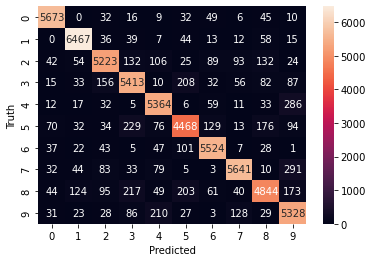

In [78]:
sn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')